## General Overview of LoRaWAN Topology

**LoRaWAN** - Long Range Wide Area Network - low power, wide area media access protocol designed to wirelessly connect 'things' to the internet. LoRaWAN is useful in IoT deployment, specially in smart environments where there are thousands of end-devices (i.e. sensors) that require minimal bandwidth and minimal energy. [[1](https://lora-alliance.org/lorawan-for-developers)]

The network architecutre is deployed in a star-of-stars topology in which gateways relay messages between end-devices and a central network server. [[2](https://lora-alliance.org/about-lorawan)]

![network-topology](images/LoRaWAN-Network-Layout.png)

* End-device is transmitting data to base-station using LoRa technolgy, which means that data is modulated using CSS technique and transmitted using ~868MHz RF, also it is worth mentioning that data is encrypted using AES128 in Counter mode (CTR). If the packet’s FPort is set to 0 then the NwkSKey is used, otherwise the AppSKey is used. An important feature of all messages in LoRa is that the counters for sent (FCntUp) and received (FCntDown) messages are maintained by the Node and Network Server, and that these counters never repeat. [[3](https://labs.mwrinfosecurity.com/assets/BlogFiles/mwri-LoRa-security-guide-1.2-2016-03-22.pdf)]
* Base-stations relay messages from end-nodes to network server using a back-haul wireless network with higher frequency, often 2.4GHz, or using wired connection (Ethernet, optics)
* Network Server decodes the packets received from base-station, performing secureity checks and adaptive data rate so it can generate the packets that should be sent back to end-devices. [[4](https://ieeexplore.ieee.org/document/8019271)]
* Application Server receives data from Network Server, can be hosted on cloud infrastructure platforms such as GoogleCloud, AWS, Azure.

## Lolland Deployment

### Network Topology

Most of the devices are street lights which means that end devices are positioned on at least 5-8 meters. Gateways are positioned 4 meters above the ground. There are columns for end-device longitude and lattitude Global position but unfortunatelly they are filled with null values. However, there are GPS coordinates for the base stations (all 6 of them) in the dataset.

![Lolland-topology](images/Lolland-Topology.png)

To show it more precise, it is possibile to calculate relative distance between each base station. Also data import will help to later visualize the communication model between end device and base station in Lolland deployment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
DATASET_PATH = '/home/alk/aau/datasets'

# 6 dataset (1 per gateway) w/ 7 spreadsheets (1 per day)
LOLLAND_PATH_BS_1 = os.path.join(DATASET_PATH, 'Lolland/LRR689')
LOLLAND_PATH_BS_2 = os.path.join(DATASET_PATH, 'Lolland/LRR68D')
LOLLAND_PATH_BS_3 = os.path.join(DATASET_PATH, 'Lolland/LRR68F')
LOLLAND_PATH_BS_4 = os.path.join(DATASET_PATH, 'Lolland/LRR690')
LOLLAND_PATH_BS_5 = os.path.join(DATASET_PATH, 'Lolland/LRR698')
LOLLAND_PATH_BS_6 = os.path.join(DATASET_PATH, 'Lolland/LRR69F')

LOLLAND_EXCEL = 'data.xlsx'

In [3]:
def load_data_from_xlsx(path, xlsx_file):
    """returns dataframe of concatenated spreadsheets from loaded excel file"""
    xlsx_path = os.path.join(path, xlsx_file)
    
    # load all sheets into a dictionary of dataframes
    # ignore the sheet name
    # ignore index of each row
    # header starts on 2nd row in excel (1st row of DF)
    df = pd.read_excel(xlsx_path, sheet_name=None, ignore_index=True, header=1) 
    
    # concatenate all the values in the dictionary into one dataframe
    df_concat = pd.concat(df.values(), ignore_index=True)
    
    return df_concat

In [4]:
data_bs_1 = load_data_from_xlsx(LOLLAND_PATH_BS_1, LOLLAND_EXCEL)
data_bs_2 = load_data_from_xlsx(LOLLAND_PATH_BS_2, LOLLAND_EXCEL)
data_bs_3 = load_data_from_xlsx(LOLLAND_PATH_BS_3, LOLLAND_EXCEL)
data_bs_4 = load_data_from_xlsx(LOLLAND_PATH_BS_4, LOLLAND_EXCEL)
data_bs_5 = load_data_from_xlsx(LOLLAND_PATH_BS_5, LOLLAND_EXCEL)
data_bs_6 = load_data_from_xlsx(LOLLAND_PATH_BS_6, LOLLAND_EXCEL)

In [5]:
lat1 = data_bs_1['LRR Lat'].max()
lat2 = data_bs_2['LRR Lat'].max()
lat3 = data_bs_3['LRR Lat'].max()
lat4 = data_bs_4['LRR Lat'].max()
lat5 = data_bs_5['LRR Lat'].max()
lat6 = data_bs_6['LRR Lat'].max()
lon1 = data_bs_1['LRR Lon'].max()
lon2 = data_bs_2['LRR Lon'].max()
lon3 = data_bs_3['LRR Lon'].max()
lon4 = data_bs_4['LRR Lon'].max()
lon5 = data_bs_5['LRR Lon'].max()
lon6 = data_bs_5['LRR Lon'].max()

In [6]:
from math import sin, cos, sqrt, atan2, radians

def dist(x_1, x_2, y_1, y_2):
    """returns str formatted distance in km between two geo points;
    takes longitude and latitude as parameters"""
    dlon = radians(x_2) - radians(x_1)
    dlat = radians(y_2) - radians(y_1)

    a = sin(dlat / 2)**2 + cos(radians(y_1)) * cos(radians(y_2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # approximate radius of earth in km
    R = 6373.0
    
    distance = R * c

    return str(round(distance)) + 'km'

def plot_dist(x_1, x_2, y_1, y_2):
    """plots straight line between two geo points;
    takes longitude and latitude as parameters"""
    plt.text(x=((x_2 - x_1)/2 + x_1 - 0.008), y=((y_2 - y_1)/2 + y_1 + 0.005), 
         s=dist(x_1, x_2, y_1, y_2), fontsize=20, color='black')
    plt.plot([x_1,x_2], [y_1,y_2], 'r--')

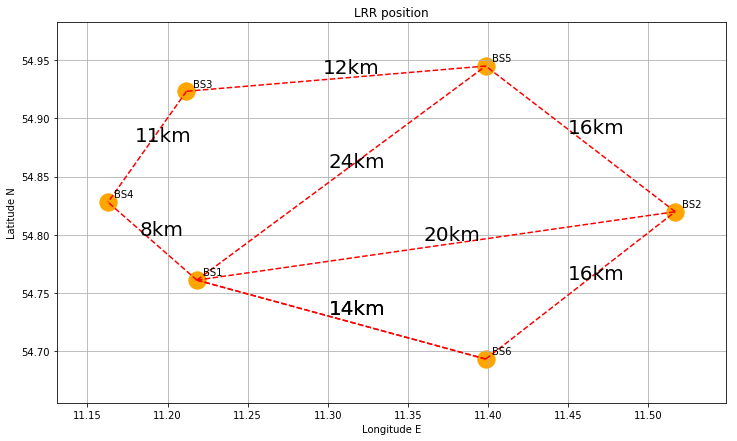

In [7]:
lat = [lat1, lat2, lat3, lat4, lat5, lat6]
lon = [lon1, lon2, lon3, lon4, lon5, lon6]
name = ['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6']
bs_ID = [data_bs_1['LRR Id'].loc[1], data_bs_2['LRR Id'].loc[1], 
      data_bs_3['LRR Id'].loc[1],data_bs_4['LRR Id'].loc[1], 
      data_bs_5['LRR Id'].loc[1], data_bs_6['LRR Id'].loc[1]
     ]

plt.figure(figsize=(12,7))
plt.scatter(x=lon, y=lat, s=300, color='orange')

for i, n in enumerate(name):
    plt.annotate(n, (lon[i]+0.004, lat[i]+0.004))
    
plot_dist(x_1=lon1, x_2=lon6, y_1=lat1, y_2=lat6)
plot_dist(x_1=lon6, x_2=lon2, y_1=lat6, y_2=lat2)
plot_dist(x_1=lon2, x_2=lon5, y_1=lat2, y_2=lat5)
plot_dist(x_1=lon5, x_2=lon3, y_1=lat5, y_2=lat3)
plot_dist(x_1=lon3, x_2=lon4, y_1=lat3, y_2=lat4)
plot_dist(x_1=lon1, x_2=lon4, y_1=lat1, y_2=lat4)
plot_dist(x_1=lon1, x_2=lon5, y_1=lat1, y_2=lat5)
plot_dist(x_1=lon1, x_2=lon6, y_1=lat1, y_2=lat6)
plot_dist(x_1=lon1, x_2=lon2, y_1=lat1, y_2=lat2)

plt.xlabel('Longitude E')
plt.ylabel('Latitude N')
plt.title('LRR position')
plt.grid()

### Communication Model

Two way communication is present in this deployment. Due to the nature of communication end-devices can be classified as Class A devices. Class A devices support bi-directional communication between a device and a gateway. Uplink messages (end-device -> base-station) can be sent at any time. The device then opens two receive windows at specified times (1s and 2s) after an uplink transmission. If the server does not respond in either of these receive windows, the next opportunity will be after the next uplink transmission from the device. The server can respond either in the first receive window, or in the second receive window, but never in both. [[5](https://www.thethingsnetwork.org/docs/lorawan/)]

![Lolland-Communication](images/Lolland-Communication.png)

In [8]:
bigdata = data_bs_1.append(data_bs_2, 
    ignore_index=True).append(data_bs_3, 
    ignore_index=True).append(data_bs_4,
    ignore_index=True).append(data_bs_5, 
    ignore_index=True).append(data_bs_6,
    ignore_index=True)

bigdata = bigdata.dropna(axis=1,how='all')

bigdata = bigdata[[ 'Timestamp', 'Timestamp(ISO)', # datetime
                   'Direction', # uplink or downlink communication
                   'DevEUI', 'DevAddr', # end device identification
                   'LRC Id', 'LRR Id', # network server and base station identification
                   'ASID', # application server id
                   'LRR Lat', 'LRR Lon', # base station location
                   'LRR RSSI', 'LRR SNR', 'LRR ESP', # strength indicators
                   'LRR Count', # some kind of gateway embedded counter
                   'FPort', 'FCnt', 'MIC', 'MType', # MAC message header
                   'MAC(hex)', 'PayloadSize', 'Payload(hex)', # MAC data
                   'Ack', 'FPending(downlink)', # acknowledgement mechanism on server side
                   'AirTime', # ToA - dependign of SPF 
                   'ADR', 'ADRACkReq', # indicates adaptivness of data rate
                   'SpFact','SubBand', 'Channel', # spreading factor, channel, BW
                   'ISMBand', 'SubID', # frequencies and BW info
                   'FCntUp', 'FCntDn', # counters
                   'DownlinkStatus', 
                   'DownlinkFailedCauseOnRX1',
                   'DownlinkFailedCauseOnRX2', 
                   'DownlinkFailedCauseOnPingSlot', # errors
                   'Late' # filtering duplicated messages
                 ]]
numerical = ['Direction', 'FPort', 'SpFact', 'MType', 'ADR', 'PayloadSize']
bigdata[numerical] = bigdata[numerical].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
# sorting dataset and selecting first 5 rows for base station with LRR Id = 689
bigdata = bigdata.sort_values(by='Timestamp',ascending=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bigdata[bigdata['LRR Id'] == 689].head(2))

                     Timestamp            Timestamp(ISO)  Direction  \
32318  2018-08-24 22:00:32.838  2018-08-24T22:00:32.838Z        0.0   
32317  2018-08-24 22:00:34.838  2018-08-24T22:00:34.838Z        1.0   

                 DevEUI   DevAddr LRC Id LRR Id                    ASID  \
32318  70B3D5B020037675  E013B063    201    689  TWA_100014020.18310.AS   
32317  70B3D5B020037675  E013B063    201    689                     NaN   

         LRR Lat    LRR Lon  LRR RSSI  LRR SNR   LRR ESP  LRR Count  FPort  \
32318  54.759548  11.212254    -109.0   -18.25 -127.3145        1.0   25.0   
32317        NaN        NaN       NaN      NaN       NaN        NaN    0.0   

       FCnt       MIC  MType      MAC(hex)  PayloadSize  \
32318   8.0  ad4dff74    2.0           NaN         11.0   
32317   1.0  dd5b8bb0    3.0  0301ff000106          0.0   

                 Payload(hex) Ack FPending(downlink)   AirTime  ADR ADRACkReq  \
32318  440c00001e00a300e68300   0                  -  1.318912  1.

For selected two messages, communication can be easily visualized. 

For the end-device to base-station communication RSSI, SNR, ESP are not *a priori* known values (they are measured on the base station side) while the rest of the data (such as message content, length and parameters such as spreading factor, bandwidth and is there going to be adaptive data rate) is known before the message is sent.

On the other hand, for the base-station to end-device communication most of the data is determined on the fly - is there going to be acknowledgement, is acknowledgement message appear in first or second RX window of the class A end device, what will be the message content, parameters such as SPF, BW, CR, sub-band... 

![ed-bs-model](images/Lolland-ed-bs-model.png)

There is no explicit data rate value that can be measured or calculated because uplink messages carry ADR=1 flag. ADR=1 is representing existance of **adaptive data rate**. ADR is mechanism for optimizing data rates, airtame and energy consumption of end device but also in the network as a whole. Generally, it should be enabled for static devices (or currently stationary mobile devices) which is basically Lolland network situation. Parameters that determine (or adapt) data rate are frame counter, SNR, number of gateways. For each measurement *margin* is calculated as: *measured SNR (of the best gateway) - required SNR to demodulate a message*.

## Svebolle Deployment

### Network Topology

Single base station is communication with few hundreds of different end-devices; network topology is quite simple.

![Svebolle-topology](images/Svebolle-Topology.png)

Since there is no positioning data for devices nor for base station, relative distances and elevation stay unknown.

### Communication Model

In [10]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
DATASET_PATH = '/home/alk/aau/datasets'

SVEBOLLE_PATH = os.path.join(DATASET_PATH, 'Svebolle')
SVEBOLLE_CSV = 'LORA_data.csv'

In [12]:
def load_data(path, csv_file, sep=','):
    """default sep param is ','"""
    csv_path = os.path.join(path, csv_file)
    return pd.read_csv(csv_path, sep)

In [13]:
data = load_data(SVEBOLLE_PATH, SVEBOLLE_CSV,
                 sep=';') # semicolon separated values

In [14]:
data['RSSI'] = [x.replace(',', '.') for x in data.RSSI]
# missing values will be interpreted as Nan
data['RSSI'] = pd.to_numeric(data.RSSI, errors='coerce')

# fix code rate column
data.rename(columns={' 4/5': 'codeRate'}, inplace=True)
data['codeRate'] = [x.replace(' ', '') for x in data.codeRate]
data['codeRate'] = [0.8 for x in data.codeRate if x == '4/5']

# insted of the JSON calculate actual data rate value
data.dataRate = data.SPF * data.BW * data.codeRate / (2**data.SPF) * 1000

# write freq in mHz insted of Hz
data.Freq = data.Freq / 10**6

# add macPayloadLen column that contains length (in bits) of MAC Payload
data['macPayloadLen'] = data.macPayload.str.len() * 4 # times 4 because of HEX

In [15]:
data.mType.value_counts()

Confirmed Data Up        689123
Confirmed Data Down          66
Proprietary                  62
RFU                          50
Join Request                 35
Join Accept                  23
Unconfirmed Data Up          20
Unconfirmed Data Down        17
Name: mType, dtype: int64

This data contains mostly 'Confirmed Data Up' messages. Still, messages are confirmed which means there is acknowledgement mechanism so communication can be defined as bi-directional. Again, we are talking about class A end-devices.

In [16]:
data = data.sort_values(by='Time',ascending=True)
print('First measurement:', data.loc[0].Time)
print('Last measurement:', data.loc[len(data)-1].Time)
print('Number of data points:', len(data))
print('Number of end-devices:',len(data.DevAddr.unique()))
data.head()

First measurement: 2017-01-02 12:08:27.788000
Last measurement: 2017-05-16 08:19:49.821000
Number of data points: 689396
Number of end-devices: 251


,Time,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,codeRate,dataRate,crcStatus,mType,macPayload,_id,macPayloadLen
158431,01-02-2017 00:07,000013b7,868.1,0,125,7,-78.0,10.2,0.8,5468.75,1,Confirmed Data Up,b713000000d3d50377158866b6891d3393214ff284accd...,589118c0b586611938f53eb7,716
159006,01-02-2017 02:40,000013bf,867.5,5,125,7,-116.2,-0.2,0.8,5468.75,1,Confirmed Data Up,bf13000080f0d3042dfb46832f2be72749cf19decc7d4c...,58913c84b586611938f540f6,284
159052,01-02-2017 02:51,000013c1,868.3,1,125,7,-119.5,-2.5,0.8,5468.75,1,Confirmed Data Up,c1130000805103043afbbf30418ab190d1869c004420a0...,58913f24b586611938f54124,492
162409,01-02-2017 17:08,000013c1,868.3,1,125,7,-120.2,-2.2,0.8,5468.75,1,Confirmed Data Up,c113000080d906035a9aff3dcb0d4dd716ece4ff0ae8c4...,589207e9b58661345f67e6e6,716
163897,01-02-2017 23:22,000013b7,868.5,2,125,7,-75.0,6.5,0.8,5468.75,1,Confirmed Data Up,b713000000fedc058375301f6741024e70c53442590361...,58925f8fb58661345f67ecb6,244


Data was collected during the period of 4 months and 14 days - from Jan, 2nd to May, 16th; during that period 689.396 measurements were generated and captured.

There is only one base-station and, judging by DevAddr attribute, 251 end-device in the network.

Measurements were carried out on the base-station side and there are more than few relevant labels:
* Time - basic datetime format to microsecond precision (might want to treat this data as time series)
* DevAddr - device address written as HEX string (easily can be converted to binary if needed)
* Freq - radio frequancy (in MHz) of signals that carry information
* Chan - channel
* BW - bandwidth (in kHz)
* SPF - spreading factor
* RSSI - received signal strength indication, type object because of usage of colon insted of dot for float
* SNR - signal-to-noise ratio
* 4/5 - coding rate -> converted to codeRate and transformed to numerical-values column
* dataRate - JSON formatted info, not relevant; maybe insert actual data rate value
* crcStatus - is there an error in transmission
* mType - type of MAC message
* macPayload - part of transmitted data that is the actual intended message
* _id - identification of package
* *macPayloadLen* - length of MAC message (transformed feature)

Since there is no ADR flag, presumably, data rate is fixed. 

Data rate was calculated using simple formula:

$$ DR = SF \times \frac{BW}{2^{SF}} \times CR $$

where

$ DR $ is data rate value,
$ SF $ is spreading factor value,
$ BW $ is bandwidth and
$ CR $ is code rate.

In [21]:
# insted of regular indexing, lets look at this data as time-series data
data = data.set_index('Time')
data.head()

,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,codeRate,dataRate,crcStatus,mType,macPayload,_id,macPayloadLen
Time,,,,,,,,,,,,,,
01-02-2017 00:07,000013b7,868.1,0,125,7,-78.0,10.2,0.8,5468.75,1,Confirmed Data Up,b713000000d3d50377158866b6891d3393214ff284accd...,589118c0b586611938f53eb7,716
01-02-2017 02:40,000013bf,867.5,5,125,7,-116.2,-0.2,0.8,5468.75,1,Confirmed Data Up,bf13000080f0d3042dfb46832f2be72749cf19decc7d4c...,58913c84b586611938f540f6,284
01-02-2017 02:51,000013c1,868.3,1,125,7,-119.5,-2.5,0.8,5468.75,1,Confirmed Data Up,c1130000805103043afbbf30418ab190d1869c004420a0...,58913f24b586611938f54124,492
01-02-2017 17:08,000013c1,868.3,1,125,7,-120.2,-2.2,0.8,5468.75,1,Confirmed Data Up,c113000080d906035a9aff3dcb0d4dd716ece4ff0ae8c4...,589207e9b58661345f67e6e6,716
01-02-2017 23:22,000013b7,868.5,2,125,7,-75.0,6.5,0.8,5468.75,1,Confirmed Data Up,b713000000fedc058375301f6741024e70c53442590361...,58925f8fb58661345f67ecb6,244


In [22]:
data[data['mType'] == 'Confirmed Data Down'].head()

,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,codeRate,dataRate,crcStatus,mType,macPayload,_id,macPayloadLen
Time,,,,,,,,,,,,,,
2017-01-05 20:08:36.936000,0e472223,867.3,4,125,8,-30.8,-18.8,0.8,3125.00000,1,Confirmed Data Down,2322470ec2c5e979e2666a806c6caaa0ffac63d38c882f...,586e99b6b586612165253af1,716
2017-01-06 13:36:49.789000,433855f8,868.1,0,125,12,-2.0,3.8,0.8,292.96875,1,Confirmed Data Down,f855384308712d0ef5549fcd3ea2a7b9a2edbbaf51a850...,586f8f62b586612165254274,492
2017-01-08 07:44:22.352000,96080836,868.5,2,125,7,-74.0,7.2,0.8,5468.75000,1,Confirmed Data Down,36080896e7b3b94d52c67c3ab9b0fd9d880,5871dfc6b586613c55dafd2e,140
2017-01-12 05:36:56.288000,005207fa,868.1,0,125,8,33.0,16.0,0.8,3125.00000,1,Confirmed Data Down,fa0752003c40c113000080eb020426c344011788f195eb...,587707e8b586611a369eb123,492
2017-01-16 12:00:52.308000,b690bd05,867.1,3,125,8,8.0,24.0,0.8,3125.00000,1,Confirmed Data Down,05bd90b6ba10f42255cacf70d20aa833106da4786a588f...,587ca7e4b5866144dac677cf,716


In [29]:
data.loc['2017-01-05 20:08:30.000000':'2017-01-05 20:08:36.936000']

,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,codeRate,dataRate,crcStatus,mType,macPayload,_id,macPayloadLen
Time,,,,,,,,,,,,,,
2017-01-05 20:08:36.935000,000013c1,868.1,0,125,7,-115.0,2.5,0.8,5468.75,1,Confirmed Data Up,c113000080c0000375407bbbd781cf9229197827ac43e9...,586e99b6b586612165253af2,716
2017-01-05 20:08:36.936000,0e472223,867.3,4,125,8,-30.8,-18.8,0.8,3125.00,1,Confirmed Data Down,2322470ec2c5e979e2666a806c6caaa0ffac63d38c882f...,586e99b6b586612165253af1,716


Communication model is modeled on the next figure:

![ed-bs-model](images/Svebolle-ed-bs-model.png)